In [3]:
import torch as th
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Define dimensions for our multivariate Gaussian
dim = 20  # Dimension of the multivariate Gaussian

# Method 1: Create a random covariance matrix that is guaranteed to be positive definite
# Start with a random matrix
A = th.randn(dim, dim)
# Multiply by its transpose to make it symmetric
cov_matrix = A @ A.T
# Add a small value to the diagonal to ensure positive definiteness
cov_matrix += th.eye(dim) * 0.01

# Method 2: Alternative approach using random eigenvalues
# Generate random positive eigenvalues
eigenvalues = th.rand(dim) * 4.9 + 0.1  # Values between 0.1 and 5.0
# Generate a random matrix
Q = th.randn(dim, dim)
# Orthogonalize using QR decomposition
Q, _ = th.linalg.qr(Q)
# Create covariance matrix: Q * diag(eigenvalues) * Q^T
cov_matrix_alt = Q @ th.diag(eigenvalues) @ Q.T

# Verify positive definiteness
is_pos_def = bool(th.all(th.linalg.eigvals(cov_matrix).real > 0))
print(f"Is the covariance matrix positive definite? {is_pos_def}")


Is the covariance matrix positive definite? True


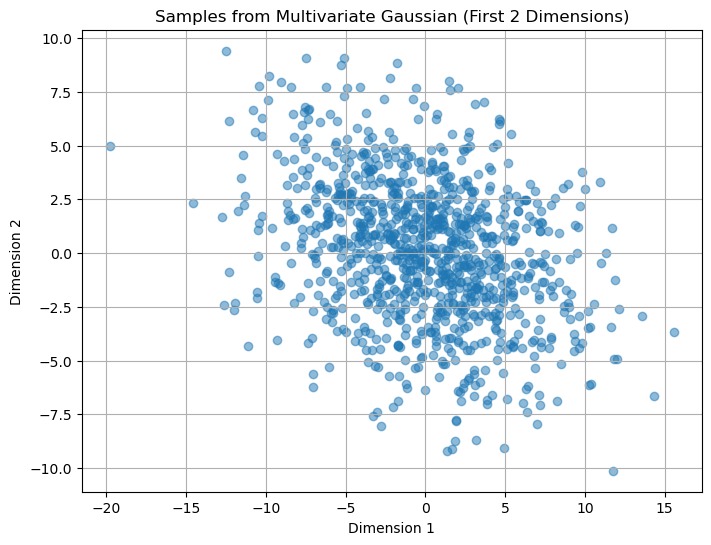

In [13]:

# Create a mean vector (zeros in this case)
mean_vector = th.zeros(dim)

# Generate samples from the multivariate Gaussian
num_samples = 1000
# PyTorch doesn't have a direct multivariate_normal like NumPy, so we use a different approach
# We can use the fact that if X ~ N(0, I) then μ + LX ~ N(μ, LL^T) where L is Cholesky decomposition
L = th.linalg.cholesky(cov_matrix)
X = th.randn(num_samples, dim)
samples = mean_vector + X @ L.T

# Visualize the first two dimensions if needed
if dim >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(samples[:, 0].numpy(), samples[:, 1].numpy(), alpha=0.5)
    plt.title('Samples from Multivariate Gaussian (First 2 Dimensions)')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.show()



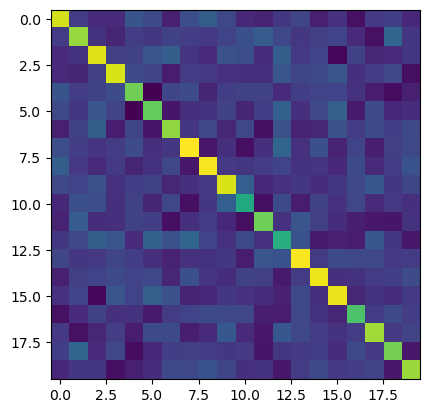

In [14]:
plt.imshow(cov_matrix_alt)